In [1]:
# Import Libraries
import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Training Data
df = pd.read_excel('../data/Wind_data_copy.xlsx', sheet_name='Train')
df.shape

(3635, 114)

# General Exploration

In [3]:
df.head()

,DATETIME,CF,WS_1133733,WS_1156770,WS_1156968,WS_1182195,WS_1193865,WS_1321569,WS_1324653,WS_1358699,...,WS_78208,WS_811655,WS_839753,WS_875373,WS_883683,WS_883699,WS_914573,WS_918665,WS_920775,WS_921049
0,2019-08-07 00:00:00,0.652524,10.35,8.99,4.57,9.69,8.90,2.90,5.74,1.16,...,11.12,6.79,9.31,11.63,10.72,10.55,11.41,10.77,10.17,9.24
1,2019-08-07 01:00:00,0.605852,9.70,8.28,5.78,9.10,7.98,2.23,3.46,0.97,...,10.47,6.40,9.50,11.10,11.02,9.91,11.16,10.98,10.16,9.09
2,2019-08-07 02:00:00,0.564094,9.04,7.39,6.21,8.98,7.78,1.98,2.62,0.92,...,10.10,6.23,9.46,10.74,11.19,9.52,11.00,11.10,10.04,9.04
3,2019-08-07 03:00:00,0.532721,8.78,7.49,6.43,8.84,7.82,1.33,2.43,0.68,...,9.67,6.01,9.45,10.65,11.27,9.11,10.93,11.18,10.20,8.89
4,2019-08-07 04:00:00,0.495608,8.23,6.88,6.81,8.52,6.65,1.64,2.45,0.59,...,9.24,5.83,9.30,9.78,10.85,8.64,10.69,10.83,9.88,8.67


In [4]:
df.tail()

,DATETIME,CF,WS_1133733,WS_1156770,WS_1156968,WS_1182195,WS_1193865,WS_1321569,WS_1324653,WS_1358699,...,WS_78208,WS_811655,WS_839753,WS_875373,WS_883683,WS_883699,WS_914573,WS_918665,WS_920775,WS_921049
3630,2020-01-07 19:00:00,0.004494,1.56,1.62,2.44,1.81,2.23,2.05,1.81,5.55,...,1.41,1.56,1.04,1.48,1.55,1.94,1.72,1.30,1.22,1.60
3631,2020-01-07 20:00:00,0.006143,1.51,1.55,2.13,1.93,2.36,1.45,1.14,4.61,...,1.32,1.82,0.88,1.12,1.32,1.87,1.81,1.42,1.05,1.87
3632,2020-01-07 21:00:00,0.008399,1.51,1.62,2.42,1.82,2.47,1.60,1.02,4.00,...,1.26,2.09,1.28,0.87,1.37,1.83,2.08,1.44,1.32,2.05
3633,2020-01-07 22:00:00,0.015788,1.53,1.73,2.22,1.83,2.53,1.44,1.15,3.78,...,1.24,1.87,1.37,1.05,1.06,1.83,1.61,1.54,1.47,2.05
3634,2020-01-07 23:00:00,0.011883,1.55,1.70,2.34,1.50,2.65,1.08,1.06,3.35,...,1.39,1.41,1.20,1.27,0.86,1.81,1.41,1.06,1.17,1.47


Upon observation, this is a time series data. Every row represents 112 wind speed measurements and electricity output for a corresponding hour on a specific day.

In [5]:
print('The data in "Train" tab ranges from', df['DATETIME'].min().strftime('%Y-%m-%d'), "to", df['DATETIME'].max().strftime('%Y-%m-%d'))

The data in "Train" tab ranges from 2019-08-07 to 2020-01-07


In [6]:
print("There are", (df['DATETIME'].dt.date.max() - df['DATETIME'].dt.date.min()).days + 1, "days in between (inclusive both sides).")

There are 154 days in between (inclusive both sides).


In [7]:
df.describe()

,CF,WS_1133733,WS_1156770,WS_1156968,WS_1182195,WS_1193865,WS_1321569,WS_1324653,WS_1358699,WS_1366338,...,WS_78208,WS_811655,WS_839753,WS_875373,WS_883683,WS_883699,WS_914573,WS_918665,WS_920775,WS_921049
count,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,...,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000
mean,0.186114,4.532563,3.943094,5.124113,5.118909,5.558190,2.524281,3.927272,3.388721,5.787298,...,5.126252,4.689553,5.455680,4.789538,6.083490,4.860514,5.756882,5.958355,5.699761,5.435894
std,0.165140,2.790853,2.371923,2.712505,3.213767,2.691479,1.655931,2.398751,2.834749,2.834219,...,2.988879,2.483077,3.005286,2.563520,3.387885,2.961514,3.496837,3.318751,3.143495,2.796631
min,0.003551,0.590000,0.490000,0.680000,0.460000,0.530000,0.500000,0.310000,0.240000,0.570000,...,0.690000,0.420000,0.410000,0.530000,0.640000,0.650000,0.740000,0.700000,0.490000,0.560000
25%,0.043264,2.230000,2.050000,2.870000,2.790000,3.310000,1.490000,1.840000,1.350000,3.410000,...,2.620000,2.830000,3.090000,2.600000,3.370000,2.490000,3.130000,3.310000,3.240000,3.215000
50%,0.130778,3.660000,3.220000,4.780000,4.490000,5.360000,2.010000,3.340000,2.460000,5.630000,...,4.420000,4.300000,4.910000,4.430000,5.430000,3.940000,5.050000,5.280000,5.110000,5.110000
75%,0.299374,6.580000,5.500000,6.860000,6.560000,7.660000,2.980000,5.770000,4.400000,7.970000,...,7.280000,6.070000,7.275000,6.870000,8.245000,6.810000,7.740000,8.060000,7.635000,7.110000
max,0.733128,14.660000,13.130000,14.640000,23.040000,17.430000,13.200000,11.810000,19.150000,17.090000,...,15.470000,15.780000,16.710000,13.530000,19.800000,15.990000,22.660000,18.910000,16.640000,18.080000


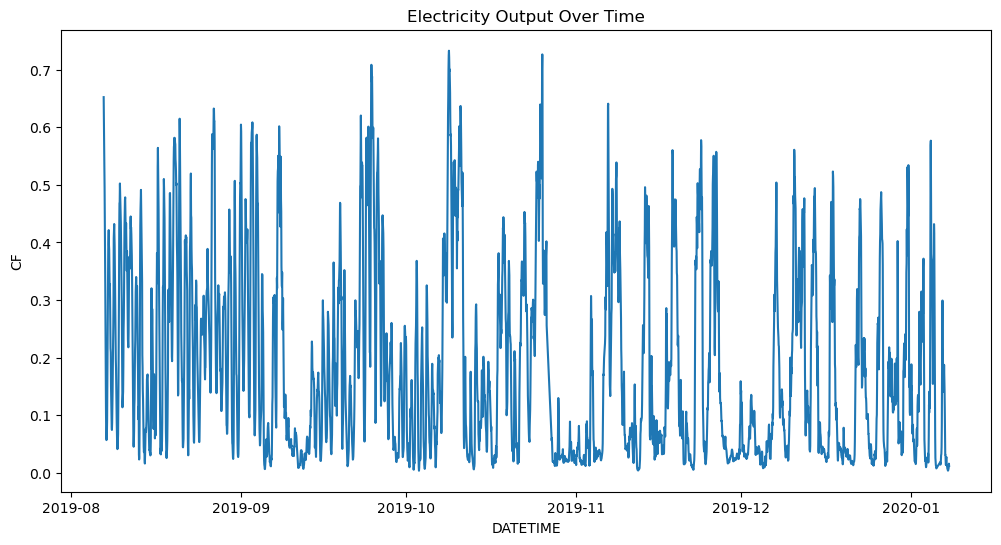

In [8]:
# Plotting the target variable, i.e. electricity output
plt.figure(figsize=(12, 6))
plt.plot(df['DATETIME'], df['CF'])
plt.title('Electricity Output Over Time')
plt.xlabel('DATETIME')
plt.ylabel('CF')
plt.show()

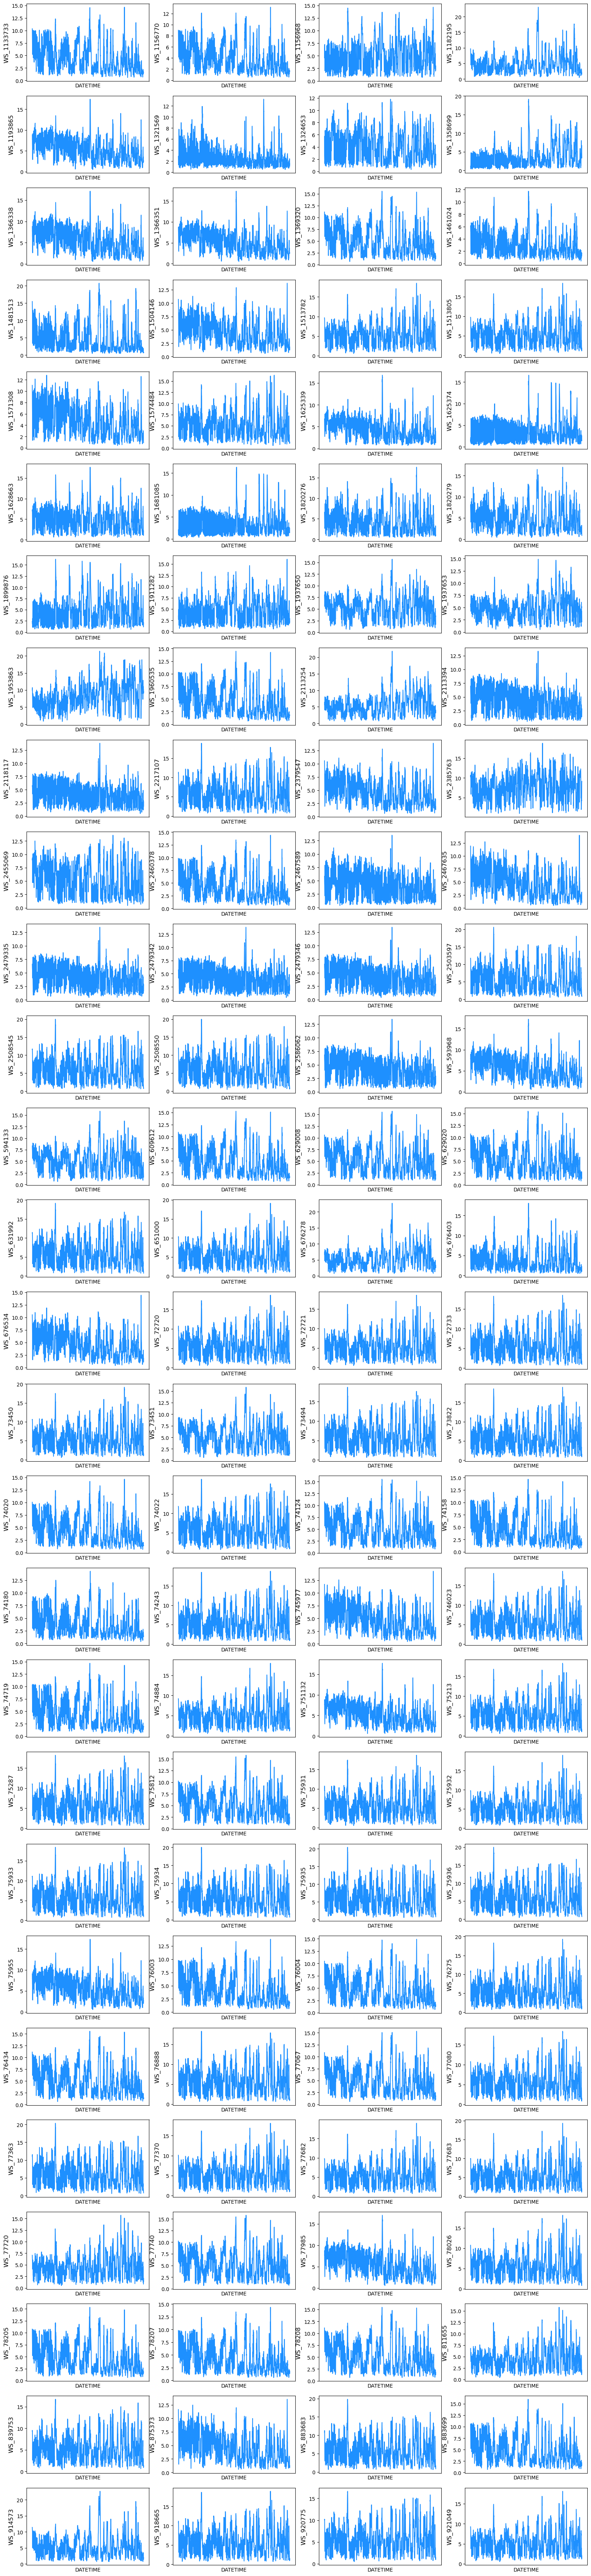

In [9]:
# Plotting the independent variables, i.e. wind speeds
ncols = 4
f, ax = plt.subplots(nrows=(df.shape[1]-2)//ncols, ncols=ncols, figsize=(16, 70))

for i, column in enumerate(df.drop(['DATETIME', 'CF'], axis=1).columns):
    sns.lineplot(x=df['DATETIME'], y=df[column].fillna(method='ffill'), ax=ax[i//ncols][i%ncols], color='dodgerblue')
    ax[i//ncols][i%ncols].set_ylabel(ylabel=column, fontsize=12)
    if (i // ncols) != (140//ncols - 1):
        ax[i//ncols][i%ncols].set_xticklabels([])
        ax[i//ncols][i%ncols].set_xticks([])

plt.tight_layout()
plt.show()

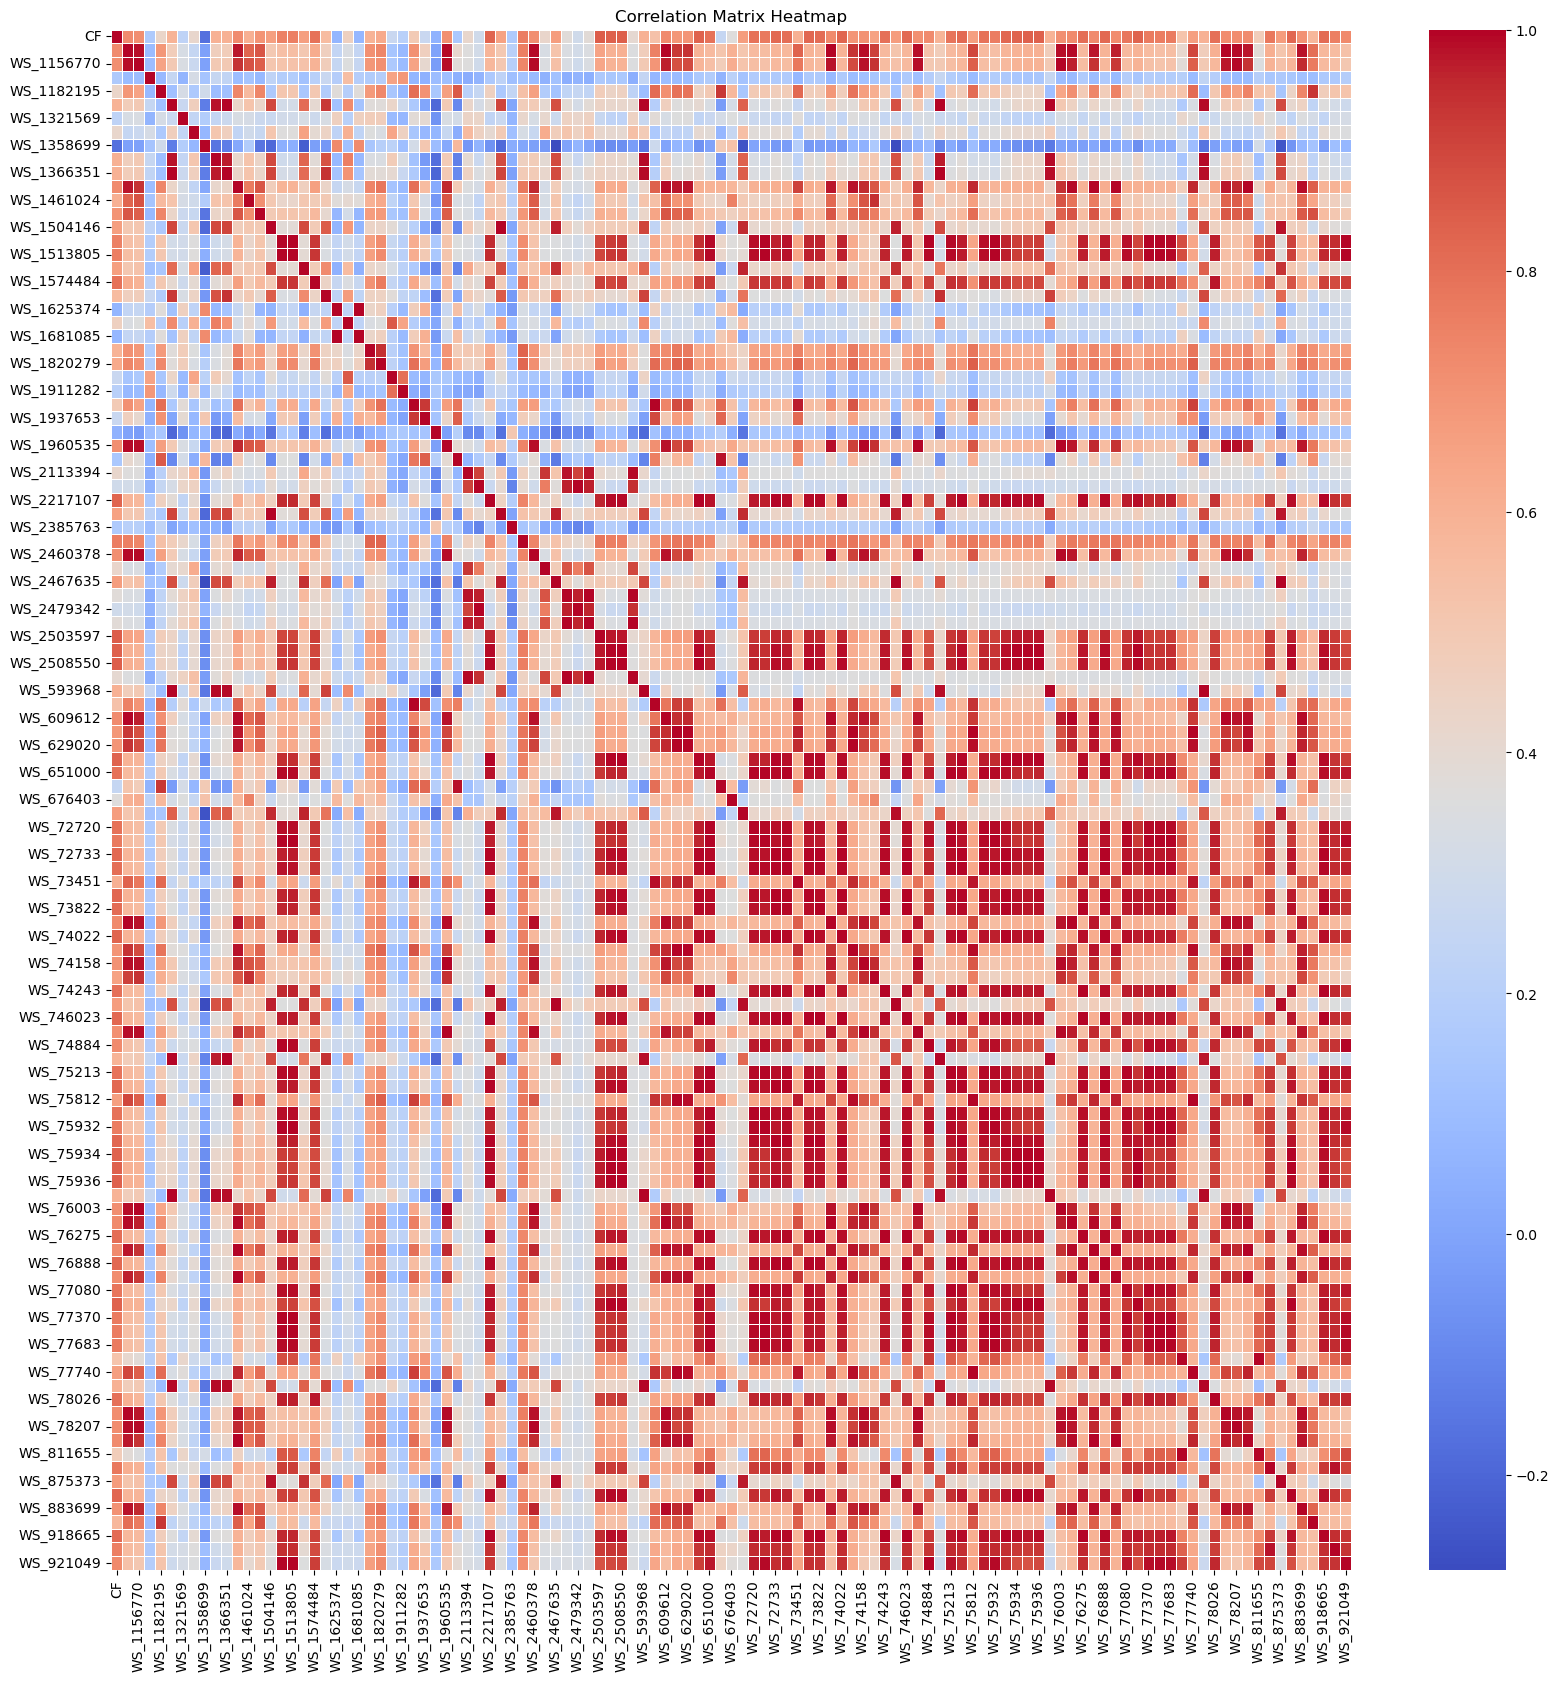

In [10]:
# Exclude the 'DATETIME' column and calculate the correlation matrix
corr_matrix = df.drop('DATETIME', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))  # You might need to adjust the size
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

There are some features that are highly correlated. We may run feature selection later to avoid multicollinearity.

# Missing Values

## - Missing Values In Features

In [11]:
print("There are a total of", df.isnull().sum().sum(), "missing values.")

There are a total of 29 missing values.


In [12]:
print("The columns with missing values and corresponding count of missing values:")
missing_values_per_column = df.isnull().sum()
missing_values_per_column[missing_values_per_column > 0]

The columns with missing values and corresponding count of missing values:


WS_1461024    26
WS_1571308     3
dtype: int64

There is no missing value in `DATETIME` or target variable `CF`. All 29 missing values are in two independent variables. Let's check closely.

In [13]:
df[['DATETIME', 'WS_1461024', 'WS_1571308']][df['WS_1461024'].isnull() | df['WS_1571308'].isnull()]

,DATETIME,WS_1461024,WS_1571308
347,2019-08-21 23:00:00,NaN,8.74
348,2019-08-22 00:00:00,NaN,8.05
349,2019-08-22 01:00:00,NaN,7.27
350,2019-08-22 02:00:00,NaN,6.46
351,2019-08-22 03:00:00,NaN,6.35
352,2019-08-22 04:00:00,NaN,5.76
353,2019-08-22 05:00:00,NaN,5.24
354,2019-08-22 06:00:00,NaN,5.41
355,2019-08-22 07:00:00,NaN,5.29
356,2019-08-22 08:00:00,NaN,3.98


Upon checking,
- `WS_1461024` has missing values on 26 consecutive hours (from 11PM on 08/21/2019 to 12AM on 08/23/2019).
- `WS_1571308` has missing values on 3 consecutive hours (from 6PM to 8PM on 11/21/2019).
Given we checked correlation among variables and learned some variables are highly correlated, I'd first check if these two variables are highly correlated with other variables.

In [14]:
pairs = corr_matrix.unstack()

In [15]:
pairs['WS_1461024'].drop('WS_1461024', errors='ignore').abs().sort_values(ascending=False)

WS_74180      0.942067
WS_1156770    0.871020
WS_76003      0.869148
WS_74158      0.867639
WS_74719      0.864103
                ...   
WS_2385763    0.211834
WS_1358699    0.177907
WS_1156968    0.134628
WS_1911282    0.130266
WS_1953863    0.046715
Length: 112, dtype: float64

In [16]:
pairs['WS_1571308'].drop('WS_1571308', errors='ignore').abs().sort_values(ascending=False)

WS_676534     0.960698
WS_745977     0.944420
WS_2467635    0.942587
WS_875373     0.936497
WS_1504146    0.889878
                ...   
WS_1681085    0.050478
WS_2385763    0.049462
WS_1625374    0.047623
WS_676278     0.029634
WS_1937653    0.014505
Length: 112, dtype: float64

Both variables are highly correlated with (i.e. absolute correlation above 90%) some other variables without any missing value, I decide to directly drop the two variables instead of imputing missing values.

In [17]:
vars_missing = ['WS_1461024', 'WS_1571308']

# Time Series Decomposition

In [18]:
df_copy = df.copy()
df_copy.set_index("DATETIME", inplace = True)

In [19]:
df_copy.head()

,CF,WS_1133733,WS_1156770,WS_1156968,WS_1182195,WS_1193865,WS_1321569,WS_1324653,WS_1358699,WS_1366338,...,WS_78208,WS_811655,WS_839753,WS_875373,WS_883683,WS_883699,WS_914573,WS_918665,WS_920775,WS_921049
DATETIME,,,,,,,,,,,,,,,,,,,,,
2019-08-07 00:00:00,0.652524,10.35,8.99,4.57,9.69,8.90,2.90,5.74,1.16,8.81,...,11.12,6.79,9.31,11.63,10.72,10.55,11.41,10.77,10.17,9.24
2019-08-07 01:00:00,0.605852,9.70,8.28,5.78,9.10,7.98,2.23,3.46,0.97,7.75,...,10.47,6.40,9.50,11.10,11.02,9.91,11.16,10.98,10.16,9.09
2019-08-07 02:00:00,0.564094,9.04,7.39,6.21,8.98,7.78,1.98,2.62,0.92,7.55,...,10.10,6.23,9.46,10.74,11.19,9.52,11.00,11.10,10.04,9.04
2019-08-07 03:00:00,0.532721,8.78,7.49,6.43,8.84,7.82,1.33,2.43,0.68,7.53,...,9.67,6.01,9.45,10.65,11.27,9.11,10.93,11.18,10.20,8.89
2019-08-07 04:00:00,0.495608,8.23,6.88,6.81,8.52,6.65,1.64,2.45,0.59,6.40,...,9.24,5.83,9.30,9.78,10.85,8.64,10.69,10.83,9.88,8.67


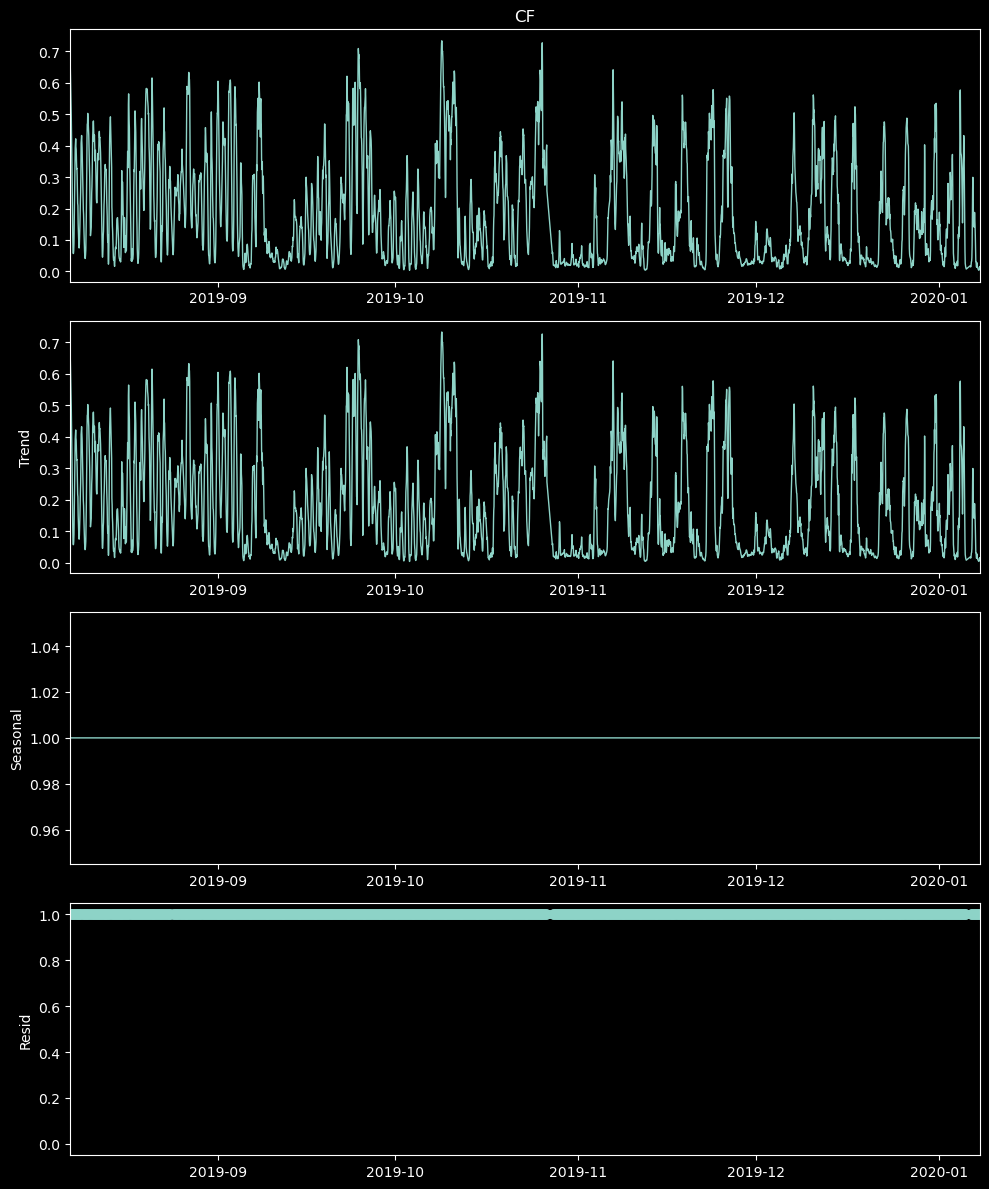

In [20]:
decomposition = seasonal_decompose(df_copy.CF, model='multiplicative', extrapolate_trend='freq', period=1)#model = 'multiplicative')
plt.style.use('dark_background')
rcParams['figure.figsize'] = 10, 12
plt.rc('lines', linewidth=1, color = 'b')
fig=decomposition.plot()

In a multiplicative decomposition model, a seasonality component with a constant value of 1.0 across the entire series implies that there is no seasonal variation in data. Similarly, a residuals component that is a constant line at 1.0 indicates that, after removing the trend, the remaining fluctuations in the data are minimal or non-existent. This suggests that the CF variable is almost entirely explained by its trend component, with very little unexplained variation or noise. Thus we can train a model using regression methods.